In [3]:
import $ivy.`org.locationtech.geotrellis::geotrellis-s3:3.5.1`
import $ivy.`com.azavea.geotrellis::maml-jvm:0.6.1`

import $ivy.$                                                 

import $ivy.$                                      

EPSG:4326
Extent(-80.00013888888888, 48.999861111111116, -78.9998611111111, 50.00013888888889)
1


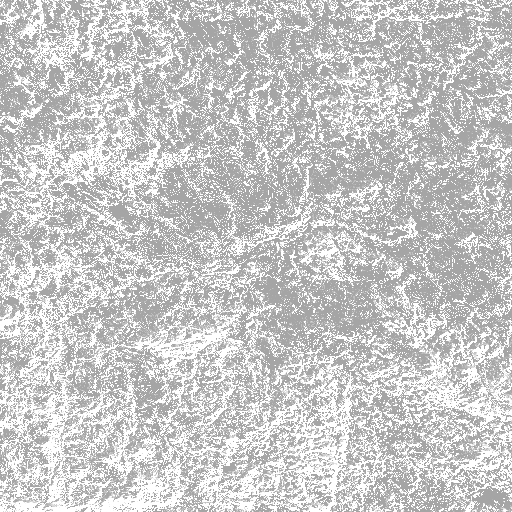

import geotrellis.raster._

import geotrellis.raster.io.geotiff._

import geotrellis.raster.geotiff._

import geotrellis.raster.render.png._


uri: String = "s3://geotrellis-workshop/elevation-tiles-tiff/N49W080.tiff"
rs: GeoTiffRasterSource = GeoTiffRasterSource(s3://geotrellis-workshop/elevation-tiles-tiff/N49W080.tiff)
raster: Raster[MultibandTile] = Raster(
  ArrayMultibandTile(3601,3600,1,int16),
  Extent(
    -80.00013888888888,
    49.00013888888889,
    -78.9998611111111,
    50.00013888888889
  )
)
hillshadeTile: Tile = ShortConstantNoDataArrayTile(
  Array(
    90,
    90,
    0,
    28,
    64,
    40,
    0,
    90,
    0,
    28,
    64,
    64,
    64,
    64,
    64,
    64,
    0,
    22,
    40,
    0,
    90,
    80,
    85,
    75,
    40,
    90,
    90,
    90,
    90,
    90,
    64,
    90,
    90,
    90,
    80,
    40,
    90,
...

In [12]:
import geotrellis.raster._
import geotrellis.raster.io.geotiff._
import geotrellis.raster.geotiff._
import geotrellis.raster.render.png._

val uri = "s3://geotrellis-workshop/elevation-tiles-tiff/N49W080.tiff"
val rs = GeoTiffRasterSource(uri)

println(rs.crs)
println(rs.extent)
println(rs.bandCount)

val raster = rs.read().get
val hillshadeTile = raster.tile.band(0).hillshade(rs.cellSize)

GeoTiff(hillshadeTile, raster.extent, rs.crs).write("hillshade.tiff")

Image(hillshadeTile.resample(512, 512).renderPng().bytes)


In [51]:
// a simple DSL example 
sealed trait NExpr
case class Add(l: NExpr, r: NExpr) extends NExpr
case class Sub(l: NExpr, r: NExpr) extends NExpr
case class Mult(l: NExpr, r: NExpr) extends NExpr
case class Value(i: Int) extends NExpr

// (2 + 1) * (3 + 4)
val re = Mult(
    Add(
        Value(2), 
        Value(1)
    ),
    Add(
        Value(3),
        Value(4)
    )
)

def evalNEInt(expr: NExpr): Int = expr match {
    case Add(l, r) => evalNEInt(l) + evalNEInt(r)
    case Sub(l, r) => evalNEInt(l) - evalNEInt(r)
    case Mult(l, r) => evalNEInt(l) * evalNEInt(r)
    case Value(i) => i
}

evalNEInt(re)

def evalNEString(expr: NExpr): String = expr match {
    case Add(l, r) => s"Add(${evalNEString(l)}, ${evalNEString(r)})"
    case Sub(l, r) => s"Sub(${evalNEString(l)}, ${evalNEString(r)})"
    case Mult(l, r) => s"Mult(${evalNEString(l)}, ${evalNEString(r)})"
    case Value(i) => s"Value($i)"
}

evalNEString(re)

defined trait NExpr
defined class Add
defined class Sub
defined class Mult
defined class Value
re: Mult = Mult(Add(Value(2), Value(1)), Add(Value(3), Value(4)))
defined function evalNEInt
res50_7: Int = 21
defined function evalNEString
res50_9: String = "Mult(Add(Value(2), Value(1)), Add(Value(3), Value(4)))"

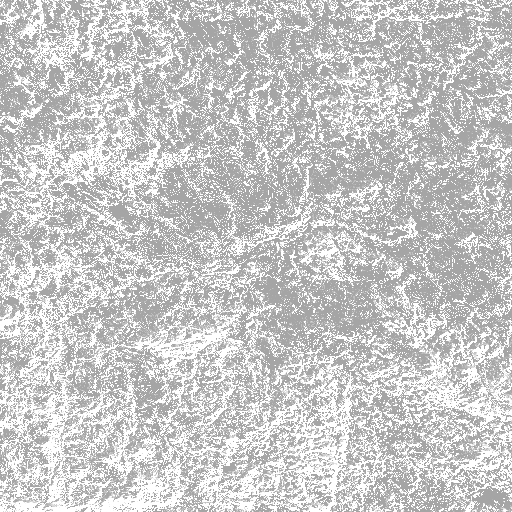

import com.azavea.maml.eval._

import com.azavea.maml.ast._

import com.azavea.maml.dsl._

import com.azavea.maml.ast.codec.tree._

import com.azavea.maml.ast


import geotrellis.raster._

import geotrellis.raster.io.geotiff._

import geotrellis.proj4._

import cats.data._

import cats.data.Validated._

import _root_.io.circe.syntax._

import cats.syntax.functor._

import cats.syntax.flatMap._

// MAML interpreter

interpreter: NaiveInterpreter = NaiveInterpreter(
  List(
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function1>,
    <function

In [35]:
import com.azavea.maml.eval._
import com.azavea.maml.ast._
import com.azavea.maml.dsl._
import com.azavea.maml.ast.codec.tree._
import com.azavea.maml.ast

import geotrellis.raster._
import geotrellis.raster.io.geotiff._
import geotrellis.proj4._
import cats.data._
import cats.data.Validated._
import _root_.io.circe.syntax._
import cats.syntax.functor._
import cats.syntax.flatMap._

// MAML interpreter
val interpreter = Interpreter.DEFAULT

val projectedRaster = ProjectedRaster(raster, rs.crs)

val hillshadeExpression = FocalHillshade(List(RasterLit(projectedRaster)), 315.0, 45.0, Some(1.0))
val result = interpreter(hillshadeExpression)

val mbt = result match {
    case Valid(t) => t.as[MultibandTile] match {
        case Valid(t) => t
        case _ => ???
    }
    case _ => ???
}

val mamlHillshadeTile = mbt.band(0)
GeoTiff(mamlHillshadeTile, raster.extent, rs.crs).write("maml-hillshade.tiff")
Image(mamlHillshadeTile.resample(512, 512).renderPng().bytes)


In [13]:
mamlHillshadeTile
    .toArray
    .toList
    .zip(hillshadeTile.toArray.toList)
    .map { case (l, r) => l - r }
    .reduce(_ + _)

res12: Int = 0

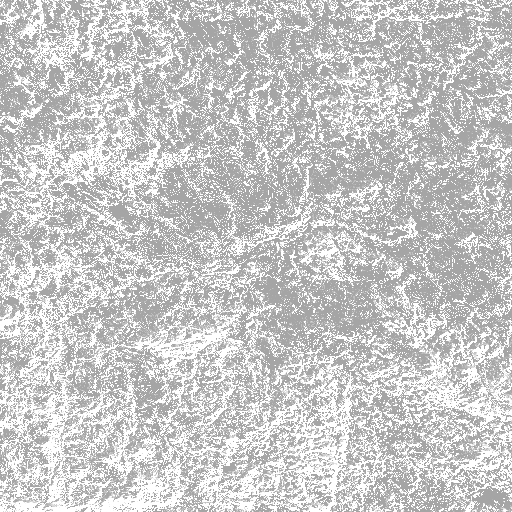

tiff: MultibandGeoTiff = MultibandGeoTiff(
  ArrayMultibandTile(661,663,1,float64),
  Extent(
    -80.00013888888888,
    48.99914833679925,
    -78.9998611111111,
    50.00112944097854
  ),
  EPSG:4326,
  Tags(Map("AREA_OR_POINT" -> "AREA"), List(Map())),
  GeoTiffOptions(
    Tiled(256, 256),
    geotrellis.raster.io.geotiff.compression.NoCompression$@4961d263,
    1,
    None,
    BandInterleave,
    None,
    Tiff
  ),
  List()
)
projectedRasterResample: ProjectedRaster[MultibandTile] = ProjectedRaster(
  Raster(
    ArrayMultibandTile(661,663,1,int16),
    Extent(
      -80.00013888888888,
      48.99914833679925,
      -78.9998611111111,
      50.00112944097854
    )
  ),
  EPSG:4326
)
result: com.azavea.maml.error.package.Interpreted[Result] = Valid(
  ImageResult(
    LazyMultibandRaster(
      Map(
        "0" -> Hillshade(
          List(
            Bound(
              ShortConstantNoDataArrayTile(
                Array(
                  -32768,
                  -32768,
 

In [22]:
val tiff = 
    GeoTiffReader
        .readMultiband("downloaded-gt-maml-cropped.tiff", e = Some(raster.extent))

val projectedRasterResample = 
    ProjectedRaster(
        projectedRaster
            .raster
            .resample(tiff.rasterExtent), 
        rs.crs
    )

val result = interpreter(FocalHillshade(List(RasterLit(projectedRasterResample)), 315.0, 45.0, Some(1.0)))

val mbtr = result match {
    case Valid(t) => t.as[MultibandTile] match {
        case Valid(t) => t
        case _ => ???
    }
    case _ => ???
}

val mamlHillshadeTileResampled = mbtr.band(0)
GeoTiff(mamlHillshadeTileResampled, raster.extent, rs.crs).write("maml-hillshade-resampled.tiff")
Image(mamlHillshadeTile.resample(512, 512).renderPng().bytes)


In [32]:
// MAML Json representation
val expression: Expression = FocalHillshade(List(RasterVar("rasterVarPath")), 315.0, 45.0, Some(1.0))
val expressionString = expression.asJson.spaces2
println(expressionString)

// Parse JSON
import _root_.io.circe.parser._
import cats.syntax.either._
val parsedExpression = parse(expressionString).flatMap(_.as[Expression]).valueOr(throw _)

expression == parsedExpression

{
  "args" : [
    {
      "name" : "rasterVarPath",
      "symbol" : "rasterV"
    }
  ],
  "azimuth" : 315.0,
  "altitude" : 45.0,
  "zFactor" : 1.0,
  "target" : "all",
  "symbol" : "fhillshade"
}


expression: Expression = FocalHillshade(
  List(RasterVar("rasterVarPath")),
  315.0,
  45.0,
  Some(1.0),
  geotrellis.raster.mapalgebra.focal.TargetCell$All$@38fe7177
)
expressionString: String = """{
  "args" : [
    {
      "name" : "rasterVarPath",
      "symbol" : "rasterV"
    }
  ],
  "azimuth" : 315.0,
  "altitude" : 45.0,
  "zFactor" : 1.0,
  "target" : "all",
  "symbol" : "fhillshade"
}"""
import _root_.io.circe.parser._

import cats.syntax.either._

parsedExpression: Expression = FocalHillshade(
  List(RasterVar("rasterVarPath")),
  315.0,
  45.0,
  Some(1.0),
  geotrellis.raster.mapalgebra.focal.TargetCell$All$@38fe7177
)
res31_6: Boolean = true

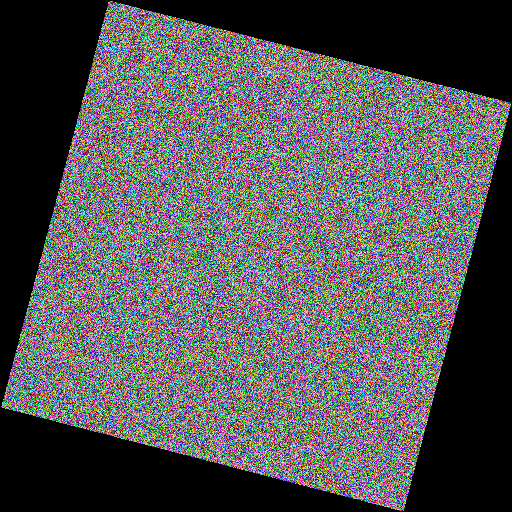

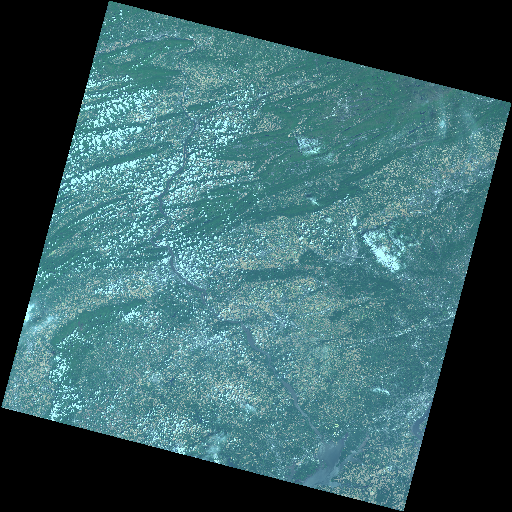

defined function getRasterSource
r: RasterSource = GeoTiffRasterSource(s3://geotrellis-workshop/lc8-small/LC08_L1TP_015032_20180521_20180605_01_T1_B4.TIF)
g: RasterSource = GeoTiffRasterSource(s3://geotrellis-workshop/lc8-small/LC08_L1TP_015032_20180521_20180605_01_T1_B3.TIF)
b: RasterSource = GeoTiffRasterSource(s3://geotrellis-workshop/lc8-small/LC08_L1TP_015032_20180521_20180605_01_T1_B2.TIF)
rt: Tile = ArrayTile(512,512,uint16raw)
gt: Tile = ArrayTile(512,512,uint16raw)
bt: Tile = ArrayTile(512,512,uint16raw)
defined function clamp

In [45]:
def getRasterSource(b: Int): RasterSource = 
    RasterSource(s"s3://geotrellis-workshop/lc8-small/LC08_L1TP_015032_20180521_20180605_01_T1_B${b}.TIF")

val r = getRasterSource(4)
val g = getRasterSource(3)
val b = getRasterSource(2)

val rt = r.read().get.tile.band(0)
val gt = g.read().get.tile.band(0)
val bt = b.read().get.tile.band(0)

// nosiy!
Image(MultibandTile(rt, gt, bt).renderPng().bytes)

// increase the contrast
def clamp(z: Int, min: Int, max: Int) = {
    if(isData(z)) { if(z > max) { max } else if(z < min) { min } else { z } }
    else z
}

Image(
    MultibandTile(
        (rt.map(clamp(_, 4000, 14000)) * 1.03).normalize(4120, 18000, 0, 255), 
        gt.map(clamp(_, 4000, 14000)).normalize(4000, 14000, 0, 255), 
        (bt.map(clamp(_, 4000, 14000)) * 0.925).normalize(3700, 12950, 0, 255)
    ).renderPng().bytes
)

In [40]:
ast.RGB(List(RasterVar("r"), RasterVar("g"), RasterVar("b")))

// increase the contrast
val rn = Normalize(
    List(Multiplication(
        List(
            Clamp(
                RasterVar("r") :: Nil, 
                min = 4000, 
                max = 14000
            ), 
            DblLit(1.03)
        )
    )),
    oldMin = 4120,
    oldMax = 18000,
    newMin = 0,
    newMax = 255
)

val gn = Normalize(
    List(
        Clamp(
            RasterVar("b") :: Nil, 
            min = 4000, 
            max = 14000
        )
    ),
    oldMin = 4000,
    oldMax = 14000,
    newMin = 0,
    newMax = 255
)

// decrease the contrast
val bn = Normalize(
    List(Multiplication(
        List(
            Clamp(
                RasterVar("b") :: Nil, 
                min = 4000, 
                max = 14000
            ), 
            DblLit(0.925)
        )
    )),
    oldMin = 3700,
    oldMax = 12950,
    newMin = 0,
    newMax = 255
)

val rgb = ast.RGB(List(rn, gn, bn))

println(rgb.asJson)

{
  "args" : [
    {
      "args" : [
        {
          "args" : [
            {
              "args" : [
                {
                  "name" : "r",
                  "symbol" : "rasterV"
                }
              ],
              "min" : 4000.0,
              "max" : 14000.0,
              "band" : null,
              "symbol" : "clamp"
            },
            {
              "value" : 1.03,
              "symbol" : "dbl"
            }
          ],
          "symbol" : "*"
        }
      ],
      "oldMin" : 4120.0,
      "oldMax" : 18000.0,
      "newMin" : 0.0,
      "newMax" : 255.0,
      "band" : null,
      "symbol" : "normalize"
    },
    {
      "args" : [
        {
          "args" : [
            {
              "name" : "b",
              "symbol" : "rasterV"
            }
          ],
          "min" : 4000.0,
          "max" : 14000.0,
          "band" : null,
          "symbol" : "clamp"
        }
      ],
      "oldMin" : 4000.0,
      "oldMax" : 1400

res39_0: RGB = RGB(
  List(RasterVar("r"), RasterVar("g"), RasterVar("b")),
  "0",
  "0",
  "0"
)
rn: Normalize = Normalize(
  List(
    Multiplication(
      List(Clamp(List(RasterVar("r")), 4000.0, 14000.0, None), DblLit(1.03))
    )
  ),
  4120.0,
  18000.0,
  0.0,
  255.0,
  None
)
gn: Normalize = Normalize(
  List(Clamp(List(RasterVar("b")), 4000.0, 14000.0, None)),
  4000.0,
  14000.0,
  0.0,
  255.0,
  None
)
bn: Normalize = Normalize(
  List(
    Multiplication(
      List(Clamp(List(RasterVar("b")), 4000.0, 14000.0, None), DblLit(0.925))
    )
  ),
  3700.0,
  12950.0,
  0.0,
  255.0,
  None
)
rgb: RGB = RGB(
  List(
    Normalize(
      List(
        Multiplication(
          List(Clamp(List(RasterVar("r")), 4000.0, 14000.0, None), DblLit(1.03))
        )
      ),
      4120.0,
      18000.0,
      0.0,
      255.0,
      None
    ),
    Normalize(
      List(Clamp(List(RasterVar("b")), 4000.0, 14000.0, None)),
      4000.0,
      14000.0,
      0.0,
      255.0,
      None
 

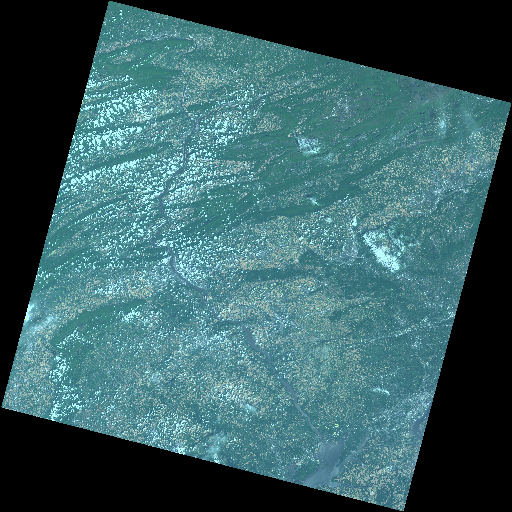

prt: ProjectedRaster[MultibandTile] = ProjectedRaster(
  Raster(
    ArrayMultibandTile(512,512,1,uint16raw),
    Extent(258885.0, 4346085.0, 493515.0, 4584315.0)
  ),
  EPSG:32618
)
pgt: ProjectedRaster[MultibandTile] = ProjectedRaster(
  Raster(
    ArrayMultibandTile(512,512,1,uint16raw),
    Extent(258885.0, 4346085.0, 493515.0, 4584315.0)
  ),
  EPSG:32618
)
pbt: ProjectedRaster[MultibandTile] = ProjectedRaster(
  Raster(
    ArrayMultibandTile(512,512,1,uint16raw),
    Extent(258885.0, 4346085.0, 493515.0, 4584315.0)
  ),
  EPSG:32618
)
rn: Normalize = Normalize(
  List(
    Multiplication(
      List(
        Clamp(
          List(
            RasterLit(
              ProjectedRaster(
                Raster(
                  ArrayMultibandTile(512,512,1,uint16raw),
                  Extent(258885.0, 4346085.0, 493515.0, 4584315.0)
                ),
                EPSG:32618
              )
            )
          ),
          4000.0,
          14000.0,
          None
        

In [41]:
val prt = ProjectedRaster(r.read().get, r.crs)
val pgt = ProjectedRaster(g.read().get, g.crs)
val pbt = ProjectedRaster(b.read().get, b.crs)

// increase the contrast
val rn = Normalize(
    List(Multiplication(
        List(
            Clamp(
                RasterLit(prt) :: Nil, 
                min = 4000, 
                max = 14000
            ), 
            DblLit(1.03)
        )
    )),
    oldMin = 4120,
    oldMax = 18000,
    newMin = 0,
    newMax = 255
)

val gn = Normalize(
    List(
        Clamp(
            RasterLit(pgt) :: Nil, 
            min = 4000, 
            max = 14000
        )
    ),
    oldMin = 4000,
    oldMax = 14000,
    newMin = 0,
    newMax = 255
)

// decrease the contrast
val bn = Normalize(
    List(Multiplication(
        List(
            Clamp(
                RasterLit(pbt) :: Nil, 
                min = 4000, 
                max = 14000
            ), 
            DblLit(0.925)
        )
    )),
    oldMin = 3700,
    oldMax = 12950,
    newMin = 0,
    newMax = 255
)

val rgb = ast.RGB(List(rn, gn, bn))

val result = interpreter(rgb)

val mbt = result match {
    case Valid(t) => t.as[MultibandTile] match {
        case Valid(t) => t
        case _ => ???
    }
    case _ => ???
}

Image(mbt.renderPng().bytes)